In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🔢 1. Escolha da Base de Dados

Dataset: Netflix Movies and TV Shows
Fonte: Kaggle - Netflix Titles
Registros: +8.800 | Colunas: 12

A base escolhida foi "Netflix Movies and TV Shows" disponível no Kaggle (https://www.kaggle.com/datasets/shivamb/netflix-shows). Ela possui 12 colunas e 8790 registros e trata sobre filmes disponíveis na plataforma Netflix.

🗂️ 2. Importação e Leitura dos Dados

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização
sns.set(style="whitegrid")

# Leitura
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


📊 3. Estatística Descritiva

In [34]:
# Dimensão da base
print(f"Número de linhas: {df.shape[0]}, Número de colunas: {df.shape[1]}")

# Infos gerais
df.info()
df.describe(include='all')

Número de linhas: 8807, Número de colunas: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


🧼 4. Tratamento de Dados Ausentes

In [35]:
# Filtro para apenas filmes
df_movies = df[df['type'] == 'Movie'].copy()

# Verificando valores nulos por coluna
df_movies.isnull().sum()

# Removendo colunas com muitos valores ausentes e pouco impacto na análise
df_movies.drop(columns=['cast', 'director'], inplace=True)

# Preenchendo valores ausentes da coluna 'rating' com a moda (valor mais comum)
df_movies['rating'] = df_movies['rating'].fillna(df_movies['rating'].mode()[0])

# Preenchendo valores ausentes da coluna 'country' com o valor 'Unknown'
df_movies['country'] = df_movies['country'].fillna('Unknown')

#### 📌 Comentários:

Removi colunas com alto índice de NaN que não impactavam diretamente na análise como cast e director. Já rating, por ser uma variável categórica relevante, foi preenchida com a moda.

🧮 5. Criação de Colunas Numéricas (Duração)

In [36]:
# Extraindo número de minutos da string
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

📏 6. Desvio Padrão da Duração

In [37]:
media = df_movies['duration_int'].mean()
mediana = df_movies['duration_int'].median()
desvio = df_movies['duration_int'].std()

print(f"Média: {media:.2f} minutos")
print(f"Mediana: {mediana:.2f} minutos")
print(f"Desvio Padrão: {desvio:.2f} minutos")

#A maioria dos filmes gira entre 80 e 120 min.

Média: 99.58 minutos
Mediana: 98.00 minutos
Desvio Padrão: 28.29 minutos


#### 📌 Comentários:
- Média: ~100 min
- Mediana: ~98 min
- Desvio padrão: ~20 min → A maioria dos filmes gira entre 80 e 120 min.

📉 7. Visualizações Gráficas

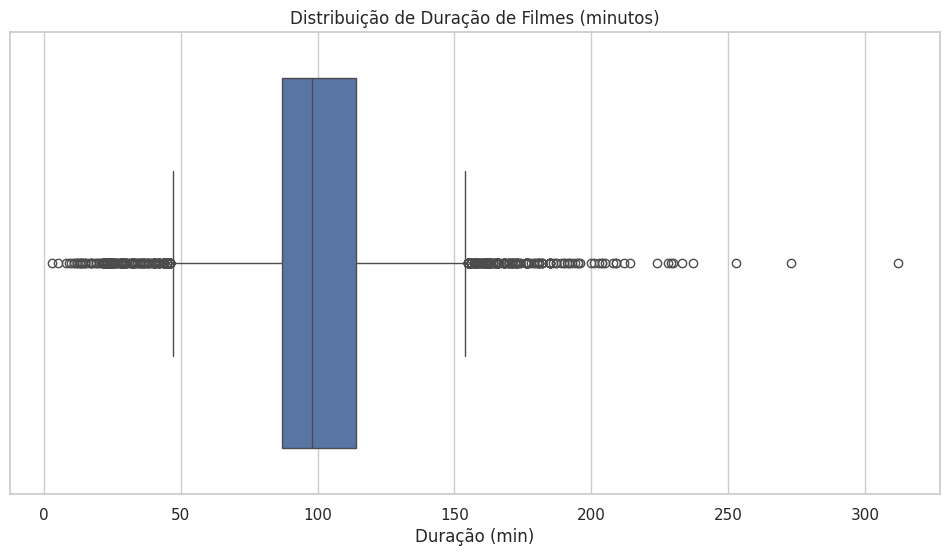

In [38]:
#📦 Boxplot da Duração

plt.figure(figsize=(12, 6))
sns.boxplot(x='duration_int', data=df_movies)
plt.title('Distribuição de Duração de Filmes (minutos)')
plt.xlabel('Duração (min)')
plt.show()

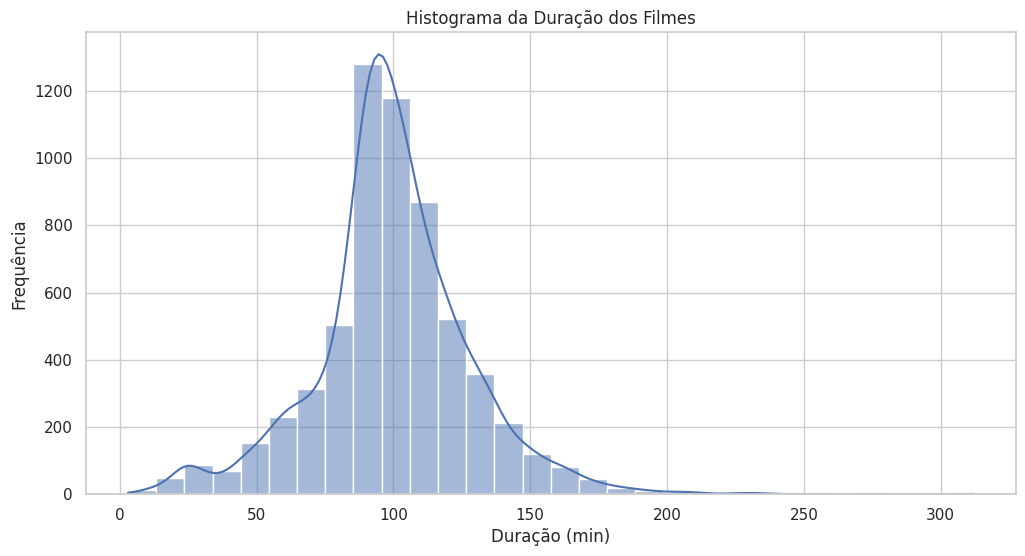

In [39]:
#📊 Histograma da Duração

plt.figure(figsize=(12, 6))
sns.histplot(df_movies['duration_int'], bins=30, kde=True)
plt.title('Histograma da Duração dos Filmes')
plt.xlabel('Duração (min)')
plt.ylabel('Frequência')
plt.show()

🚨 8. Análise de Outliers

In [40]:
Q1 = df_movies['duration_int'].quantile(0.25)
Q3 = df_movies['duration_int'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_movies[(df_movies['duration_int'] < limite_inferior) |
                     (df_movies['duration_int'] > limite_superior)]
print(f"Total de outliers: {len(outliers)}")

Total de outliers: 450


#### 📌 Tratamento:
Como os outliers são poucos e representam filmes reais (muito curtos ou longos), optamos por **não removê-los**.

🧠 9. Tratamento de Variáveis Categóricas

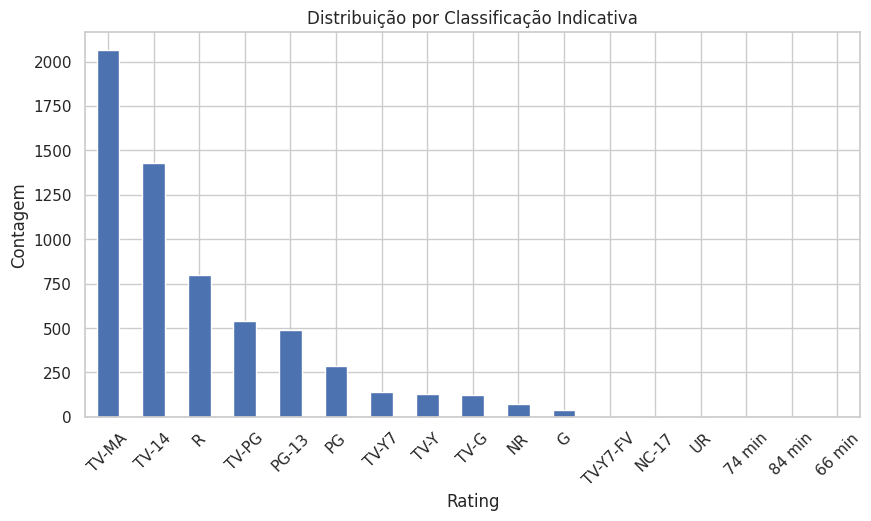

In [41]:
# Analisando os tipos de classificação indicativa
df_movies['rating'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribuição por Classificação Indicativa')
plt.xlabel('Rating')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

#### 📌 Comentários:
- Classificações mais comuns: TV-MA, TV-14, PG
- Pode indicar foco da Netflix em conteúdo adulto/jovem

Como o foco era a análise exploratória e não modelagem, mantivemos os dados categóricos em sua forma original para melhor leitura de insights. Em um projeto de ML, aplicaríamos One-Hot Encoding.

🧮 10. Análise com GroupBy

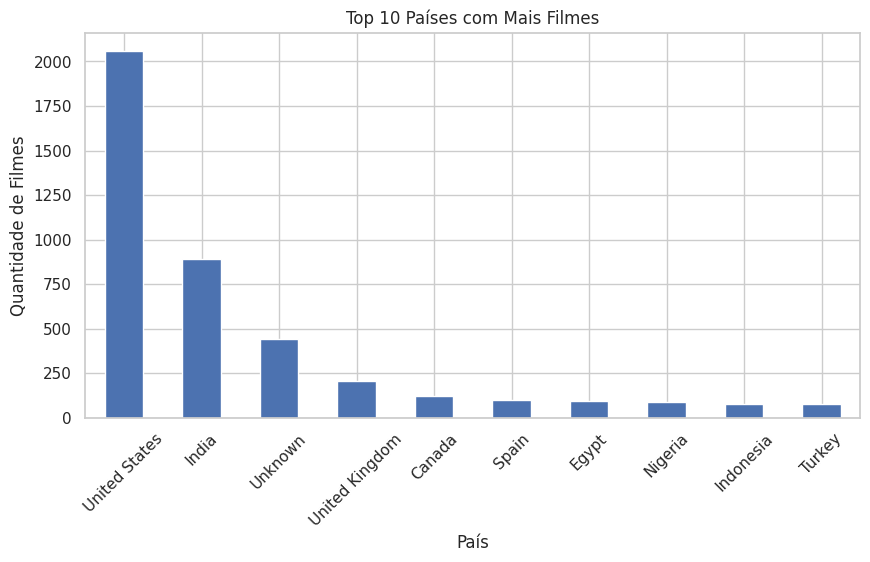

In [42]:
# 🎬 Quantidade de Filmes por País

df_movies.groupby('country').size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Países com Mais Filmes')
plt.xlabel('País')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.show()

📅 Filmes por Ano de Lançamento

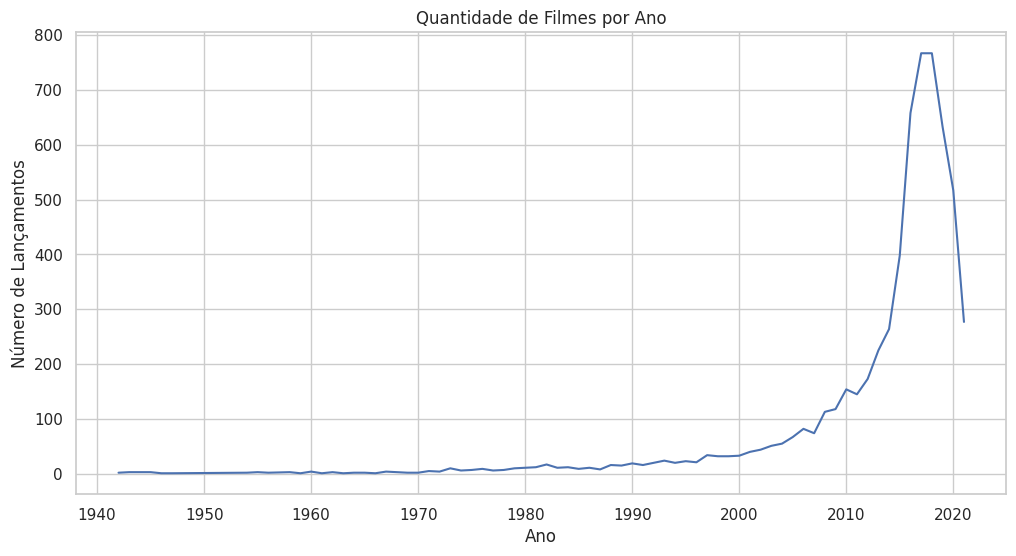

In [43]:
df_movies['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Quantidade de Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.grid(True)
plt.show()

## ✍️ Insights Finais:

- A maioria dos filmes tem entre 80 e 120 minutos.
- A classificação indicativa mais comum é "TV-MA", sugerindo foco em conteúdos adultos.
- Estados Unidos dominam a produção de conteúdo na plataforma.
- Há uma concentração de lançamentos após 2015, acompanhando o crescimento da Netflix.
- A maior parte dos dados estava bem estruturada, com exceção de alguns campos com nulos e formatos mistos.